In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Exploratory Data Analysis (EDA)

In [3]:
df.shape

(1599, 12)

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As we can see, there are no null values in any of the columns of the dataset. So, there is no need to handle null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

We can observe from the above that all the features contain continuous data and the label "quality" contains categorical data. So, this is a classification task.

In [8]:
#Checking the number of unique values in each column
df.nunique().to_frame("Number of unique values")

,Number of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [9]:
#Check the number of unique values in the label "quality"
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
#Check the value counts for each category in the target variable "quality"
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
#Statistical summary of numerical columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From the above statistical data, we can observe the following:

There are no null values in any of the columns

For all the columns except volatile acidity, citric acid, density and pH, the mean is greater than the median (50%) which implies that there is right skewness in these columns. 

For all the columns except citric acid, alcohol, density and pH, max is much bigger than 75% which means that there are outliers in these columns.

# Data Visualization

Univariate Analysis

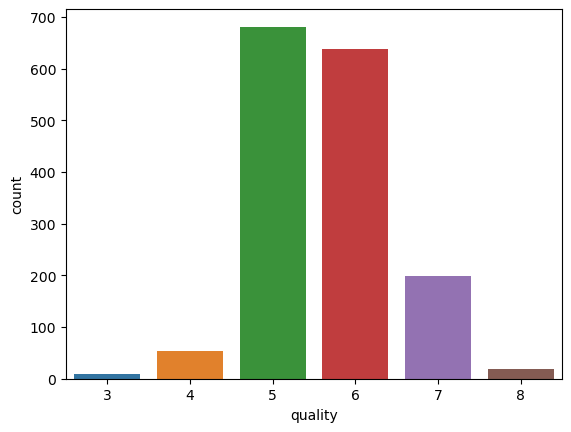

In [12]:
#Visualize the number of values for each wine quality in the target variable
ax=sns.countplot(x='quality',data=df)

We can observe from the above graph that the number of values for wine qualities 5 and 6 is much higher than the other qualities. This creates class imbalance in the target variable. We will rectify it later.

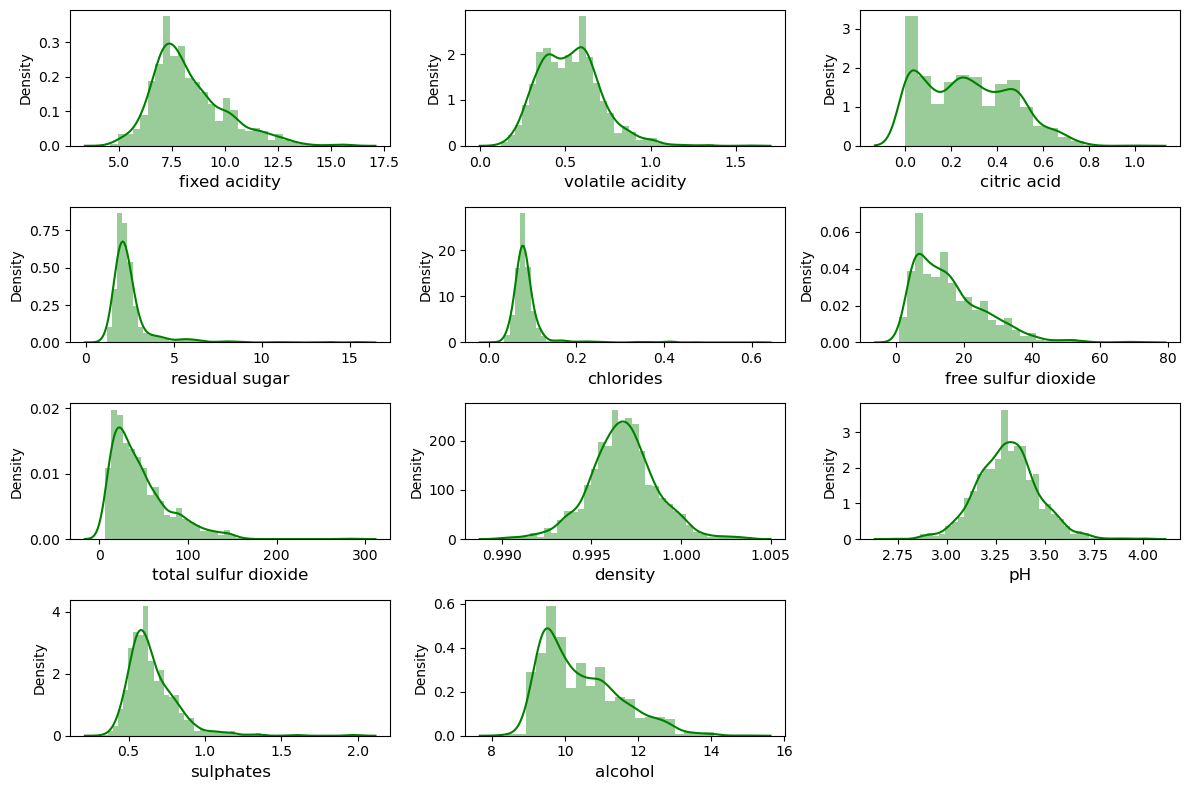

In [13]:
#Visualize the distribution of data in all the features
plt.figure(figsize=(12,8),facecolor="white")
plotnumber=1
for col in df.columns:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[col],color="green")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots, we can observe that the data in all the columns are normally distributed. The columns residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide and suphates are skewed to the right. Other columns have little or no skewness.

Bivariate Analysis

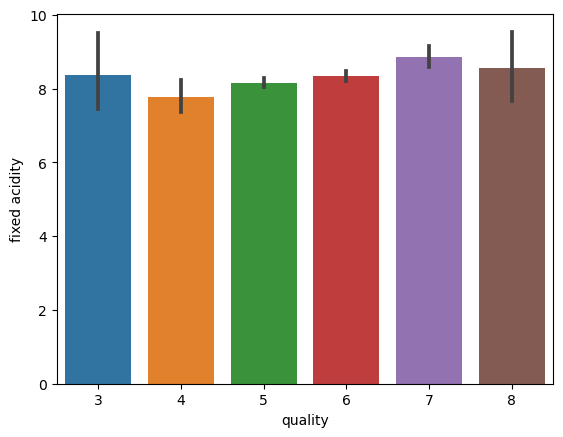

In [14]:
#Compare fixed acidity vs quality
sns.barplot(x='quality',y='fixed acidity',data=df)
plt.show()

We can observe from the above graph that when fixed acidity increases, the quality of the wine improves. So, fixed acidity is directly proportional to quality.

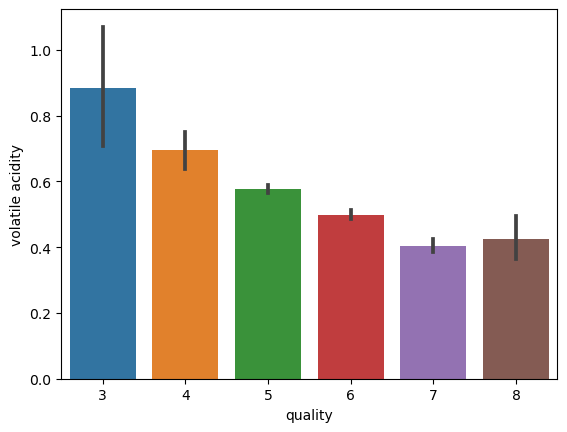

In [15]:
#Compare volatile acidity vs quality
sns.barplot(x='quality',y='volatile acidity',data=df)
plt.show()

We can observe from the above graph that as volatile acidity decreases, the quality of the wine improves. So, volatile acidity is inversely proportional to quality.

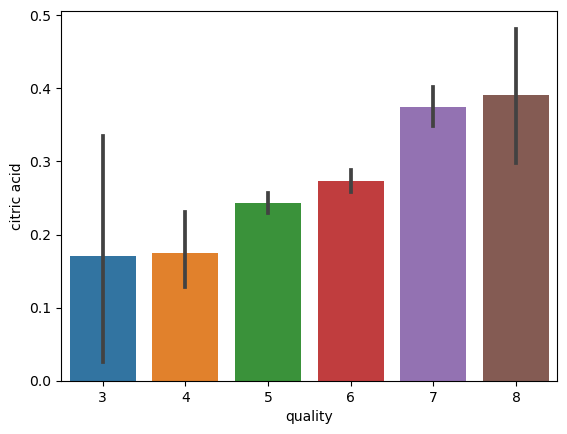

In [16]:
#Compare citric acid vs quality
sns.barplot(x='quality',y='citric acid',data=df)
plt.show()

We can observe from the above graph that citric acid is directly proportional to quality of the wine.

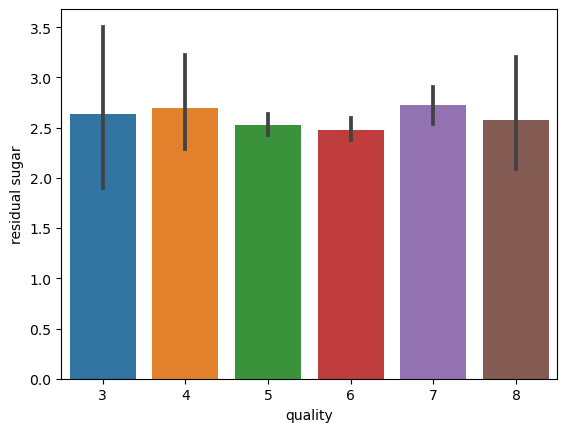

In [17]:
#Compare residual sugar vs quality
sns.barplot(x='quality',y='residual sugar',data=df)
plt.show()

We can observe from the above graph that residual sugar has not much correlation with quality.

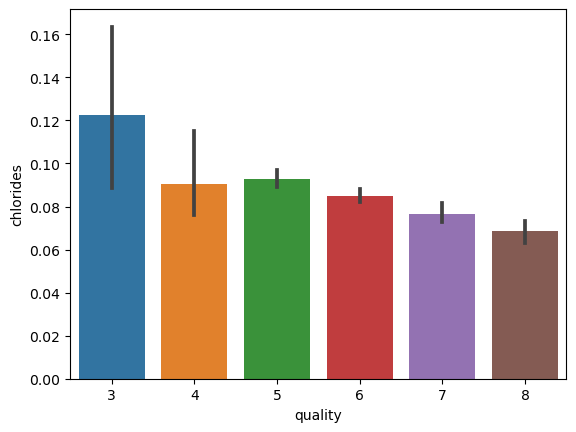

In [18]:
#Compare chlorides vs quality
sns.barplot(x='quality',y='chlorides',data=df)
plt.show()

We can observe from the above graph that chlorides is inversely proportional to quality

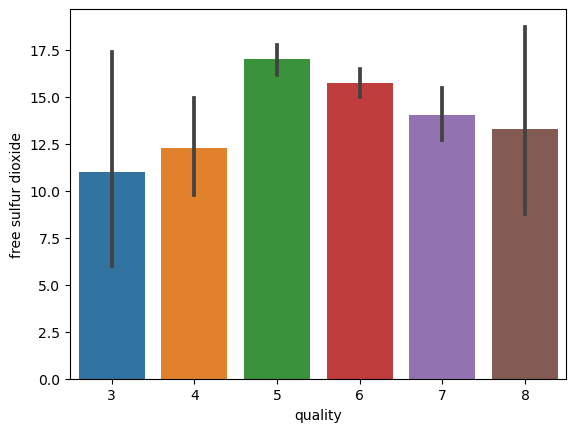

In [19]:
#Compare free sulfur dioxide vs quality
sns.barplot(x='quality',y='free sulfur dioxide',data=df)
plt.show()

We can observe from the above graph that free sulfur dioxide is directly proportional to quality.

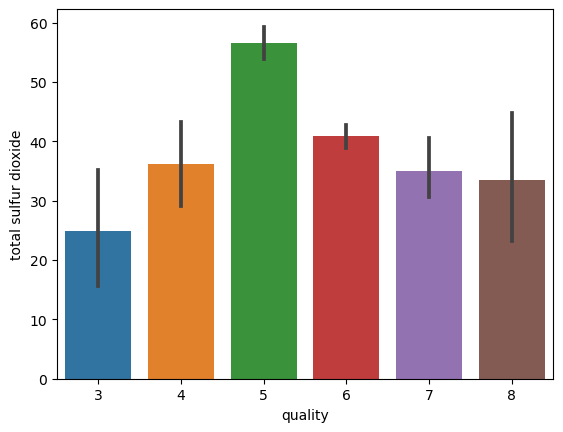

In [20]:
#Compare total sulfur dioxide vs quality
sns.barplot(x='quality',y='total sulfur dioxide',data=df)
plt.show()

We can observe from the above graph that total sulfur dioxide does not have much corrleation with quality.

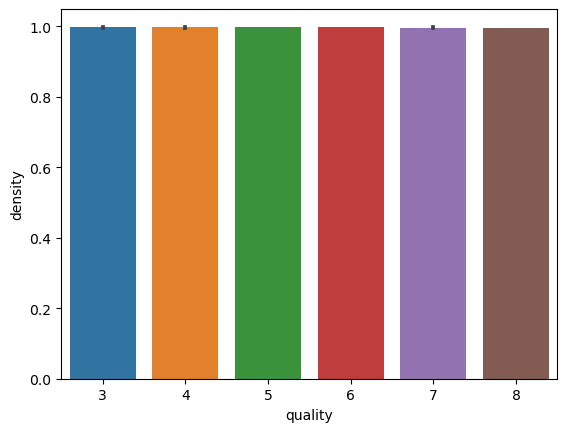

In [21]:
#Compare density vs quality
sns.barplot(x='quality',y='density',data=df)
plt.show()

We can observe from the above graph that density has no correlation with quality.

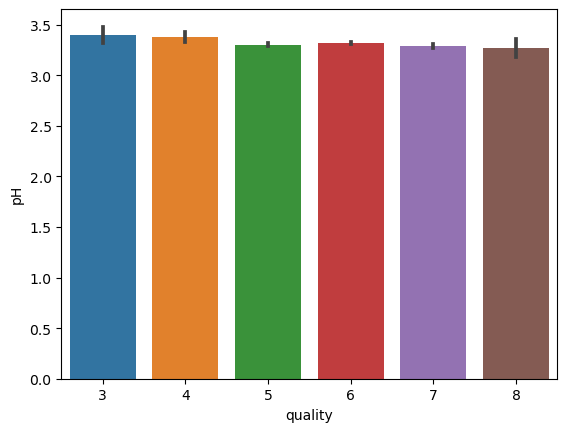

In [22]:
#Compare pH vs quality
sns.barplot(x='quality',y='pH',data=df)
plt.show()

We can observe from the above graph that pH has no correlation with quality.

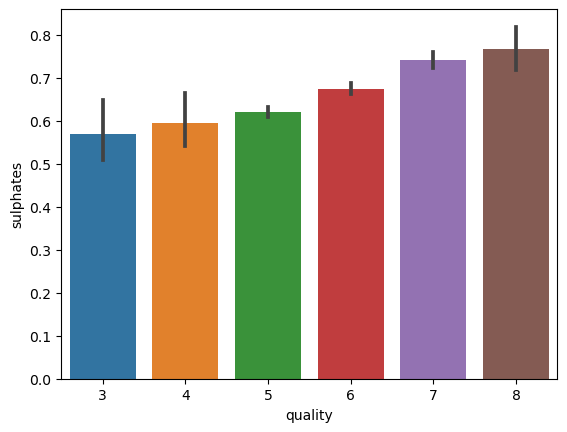

In [23]:
#Compare sulphates vs quality
sns.barplot(x='quality',y='sulphates',data=df)
plt.show()

We can observe from the above graph that sulphates is directly proportional to quality.

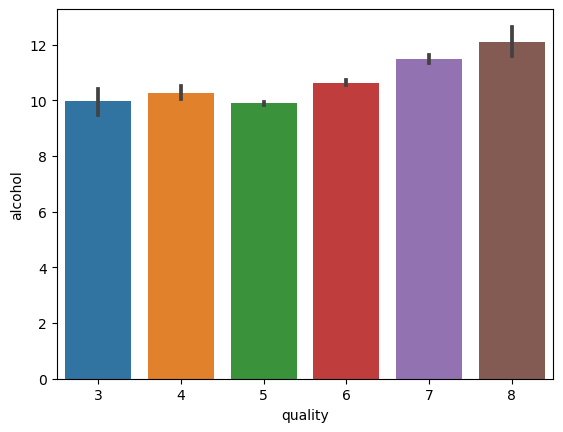

In [24]:
#Compare alcohol vs quality
sns.barplot(x='quality',y='alcohol',data=df)
plt.show()

We can observe from the above graph that alcohol is directly proportional to quality.

From all of the above graphs, we come to the conclusion that density and pH have no correlation with the label "quality". Hence we will remove these two features from the dataset.

In [25]:
#Remove density and PH from the Dataframe
df.drop(["density","pH"],axis=1,inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.71,10.2,5


Checking for Outliers

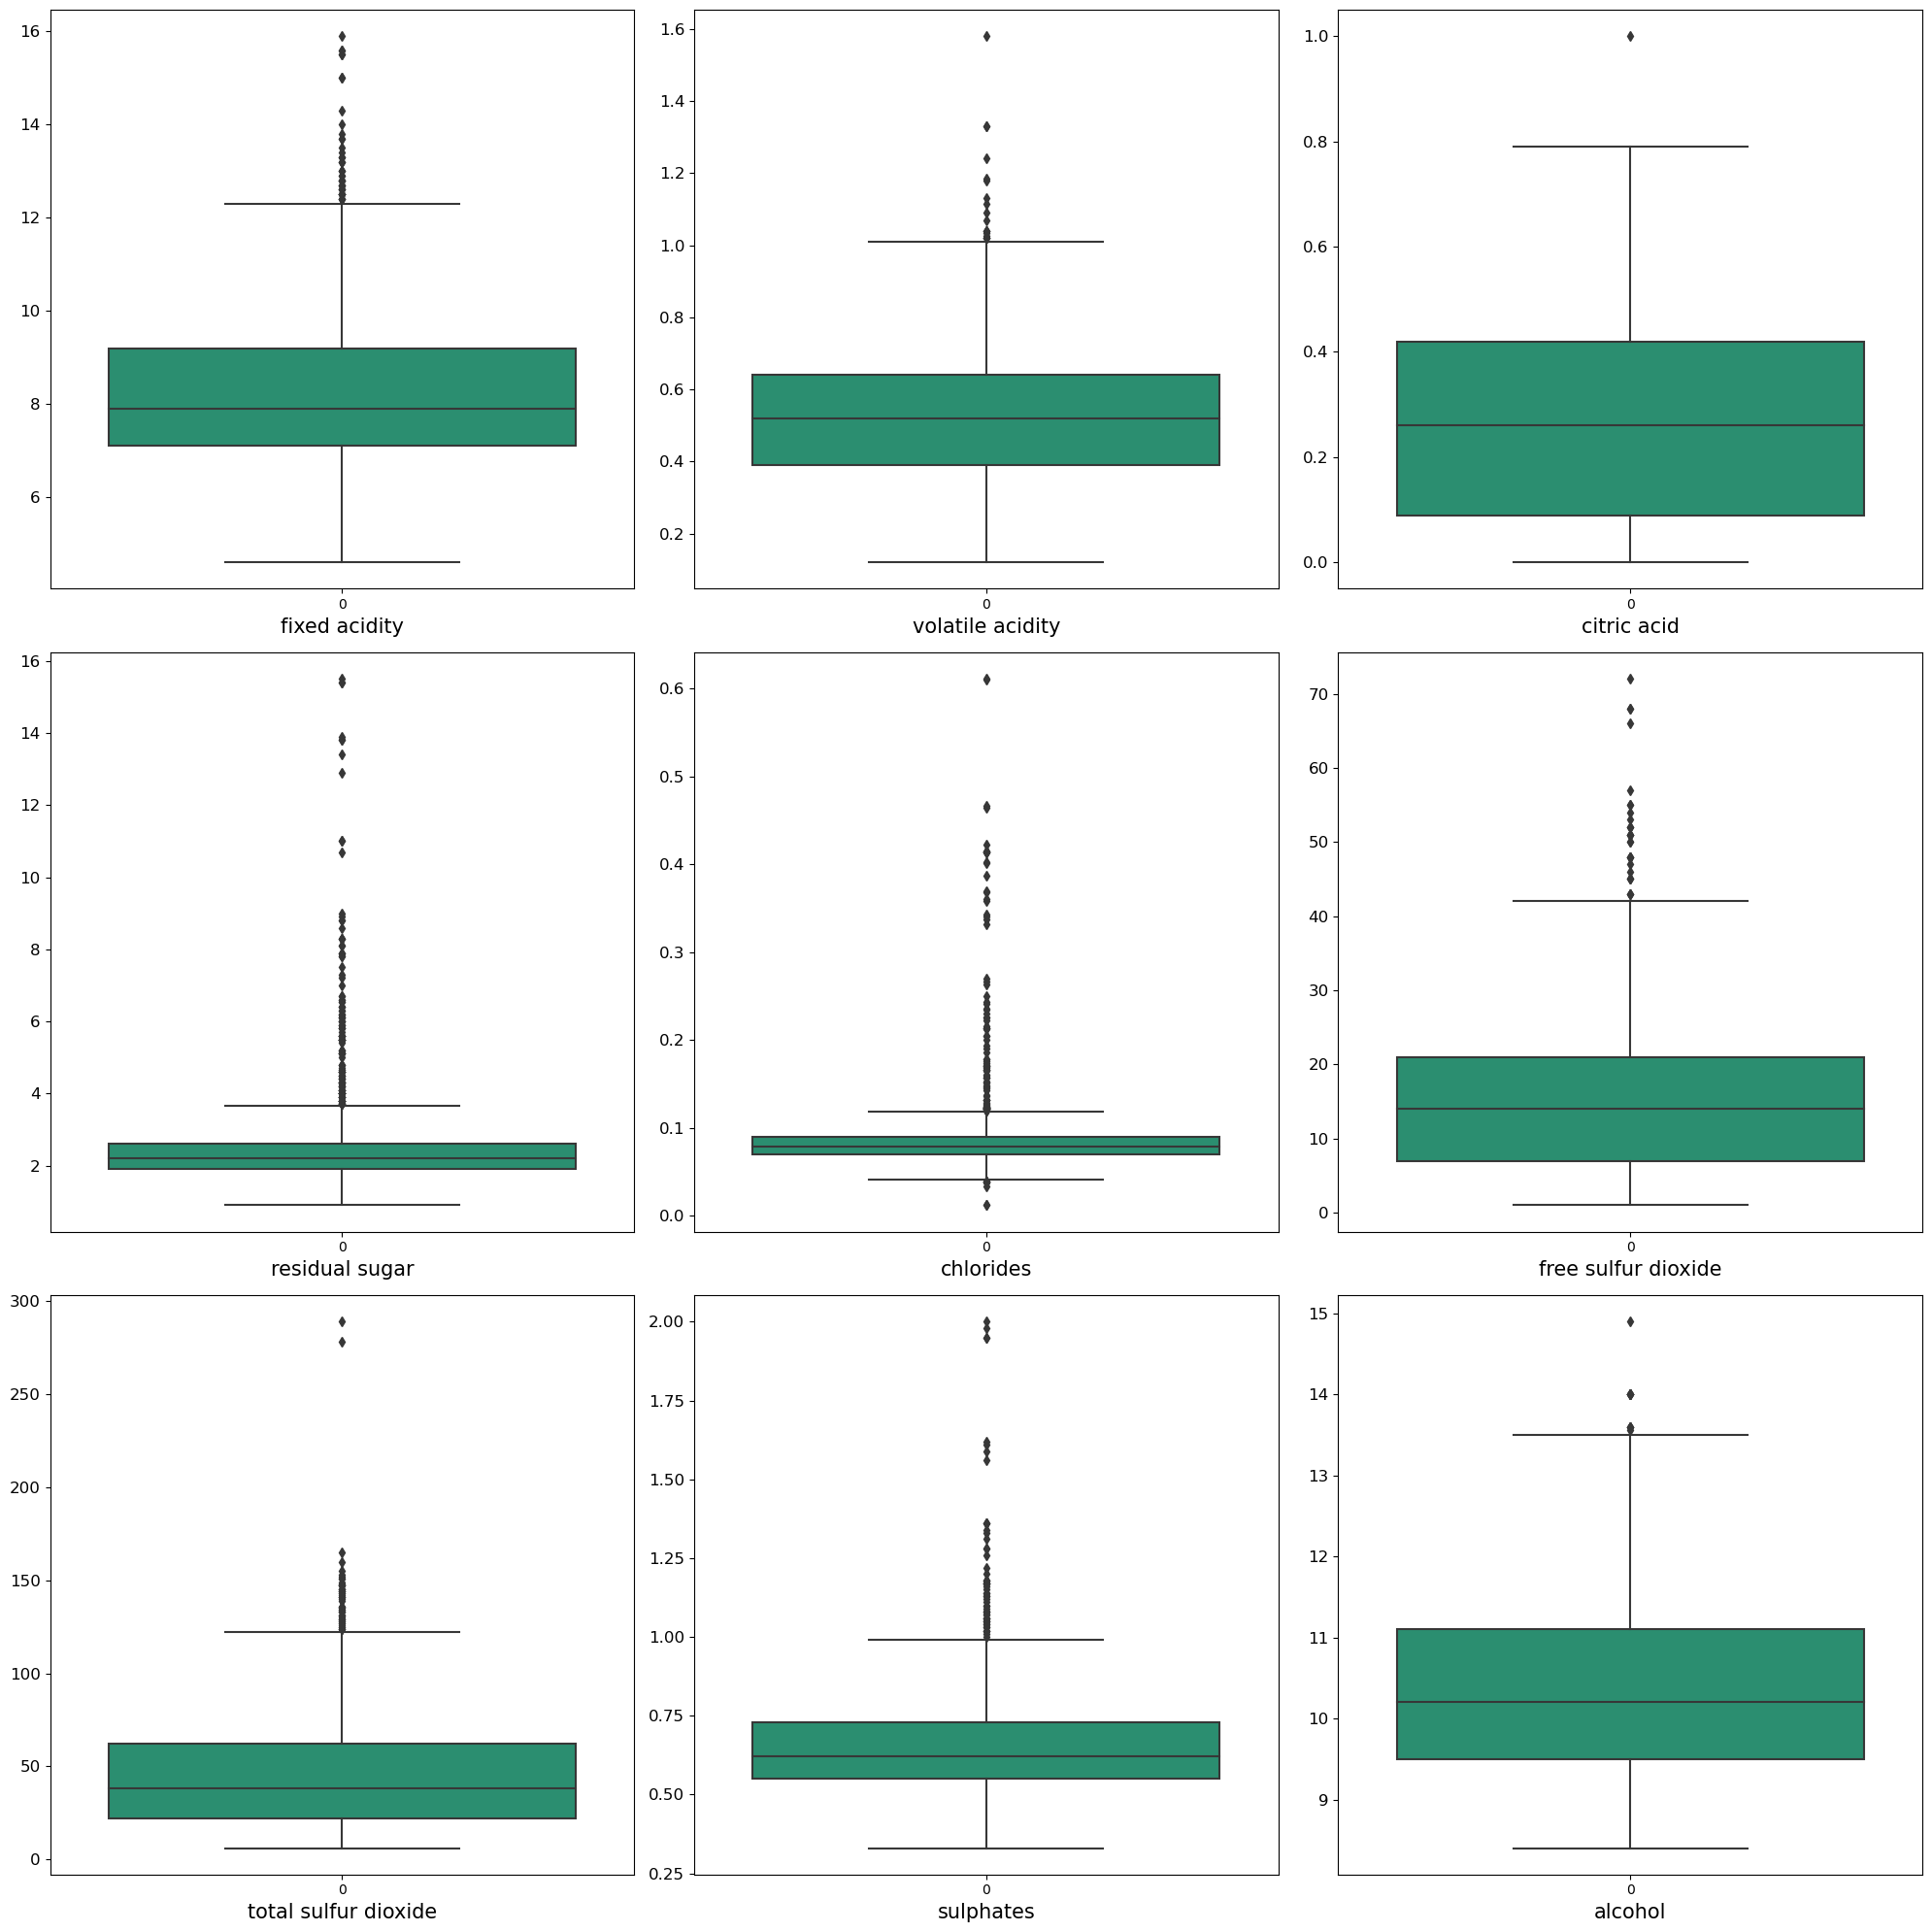

In [26]:
#Check the outliers through boxplot
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1
for col in df.columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],palette="Dark2")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=12)
    plotnumber+=1
plt.tight_layout()

From the above graphs, we can find outliers in all the features.

So, we will remove the outliers from all the features using zscore technique.

In [27]:
from scipy.stats import zscore
out_features=df.drop("quality",axis=1)
z=np.abs(zscore(out_features))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.579207,0.960246
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.128950,0.584777
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.048089,0.584777
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.461180,0.584777
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.579207,0.960246
...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.461180,0.072294
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.601055,0.729364
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.542042,0.541630
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.305990,0.209308


In [28]:
df1=df[(z<3).all(axis=1)]
df1.shape

(1472, 10)

In [29]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.71,10.2,5


In [30]:
print("Data loss percentage - ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage -  7.9424640400250155


The data loss percentage is below 10%. So, it is acceptable.

Checking for Skewness

In [31]:
#Check for skewness in the data
df1.skew()

fixed acidity           0.785702
volatile acidity        0.383844
citric acid             0.291665
residual sugar          2.428922
chlorides               2.172004
free sulfur dioxide     0.861614
total sulfur dioxide    1.163524
sulphates               0.887821
alcohol                 0.754957
quality                 0.237660
dtype: float64

Except volatile acidity and citric acid, there is skewness in all the features. So, we will remove skewness from these features using Yeo-Johnson Transformation method as below.

In [32]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
df1["fixed acidity"]=pt.fit_transform(df1[["fixed acidity"]])
df1["residual sugar"]=pt.fit_transform(df1[["residual sugar"]])
df1["chlorides"]=pt.fit_transform(df1[["chlorides"]])
df1["free sulfur dioxide"]=pt.fit_transform(df1[["free sulfur dioxide"]])
df1["total sulfur dioxide"]=pt.fit_transform(df1[["total sulfur dioxide"]])
df1["sulphates"]=pt.fit_transform(df1[["sulphates"]])
df1["alcohol"]=pt.fit_transform(df1[["alcohol"]])

In [33]:
#Check for skewness in the features again
df1.skew()

fixed acidity           0.009473
volatile acidity        0.383844
citric acid             0.291665
residual sugar         -0.057392
chlorides              -0.211149
free sulfur dioxide    -0.022024
total sulfur dioxide   -0.006805
sulphates               0.017975
alcohol                 0.110083
quality                 0.237660
dtype: float64

Now, we can see that the skewness is reduced in all the columns.

In [34]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,-0.455551,0.700,0.00,-0.592837,-0.144889,-0.246775,-0.074821,-0.580995,-1.116242,5
1,-0.168230,0.880,0.00,0.623614,0.948230,1.083788,0.943173,0.456076,-0.536502,5
2,-0.168230,0.760,0.04,0.191434,0.682946,0.232143,0.614843,0.225029,-0.536502,5
3,1.577619,0.280,0.56,-0.592837,-0.203152,0.433651,0.774699,-0.385664,-0.536502,6
4,-0.455551,0.700,0.00,-0.592837,-0.144889,-0.246775,-0.074821,-0.580995,-1.116242,5
...,...,...,...,...,...,...,...,...,...,...
1594,-1.486754,0.600,0.08,-0.368674,0.589426,1.522872,0.307018,-0.385664,0.270584,5
1595,-1.794291,0.550,0.10,0.021234,-1.041847,1.887613,0.528539,0.997141,0.881138,6
1596,-1.389282,0.510,0.13,0.191434,-0.144889,1.345641,0.165106,0.934914,0.723128,6
1597,-1.794291,0.645,0.12,-0.368674,-0.203152,1.522872,0.307018,0.671019,-0.047191,5


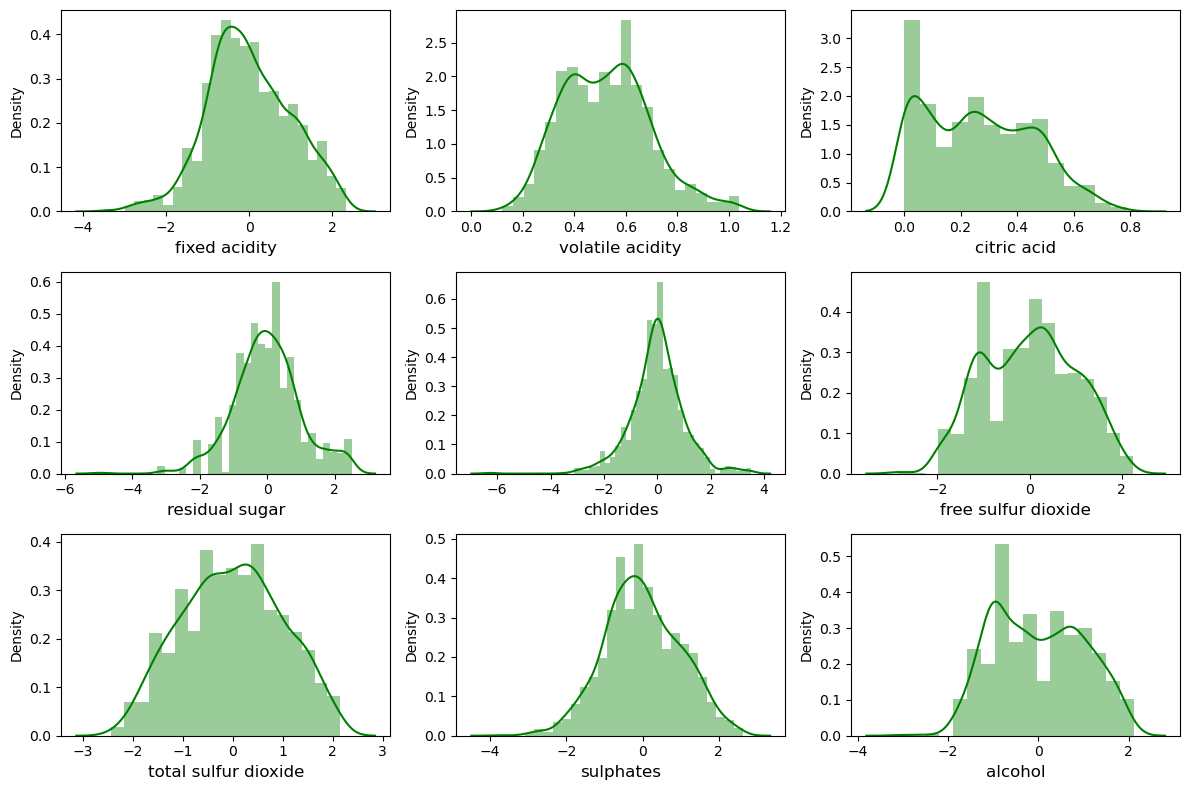

In [36]:
#Check the skewness again in all the columns by visulaizing through distplot
plt.figure(figsize=(12,8),facecolor="white")
plotnumber=1
for col in df1.columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1[col],color="green")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Now, all the columns look perfect without much of skewness.

In [37]:
#Check the correlation between features and the label
cor=df1.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
fixed acidity,1.000000,-0.282482,0.674078,0.224614,0.268876,-0.166460,-0.099865,0.181668,-0.073718,0.115092
volatile acidity,-0.282482,1.000000,-0.586960,0.050162,0.096200,0.029336,0.093351,-0.340020,-0.210759,-0.363484
citric acid,0.674078,-0.586960,1.000000,0.188974,0.105465,-0.099592,-0.022843,0.305117,0.147907,0.236078
residual sugar,0.224614,0.050162,0.188974,1.000000,0.231697,0.022590,0.116428,0.077377,0.122581,0.039368
chlorides,0.268876,0.096200,0.105465,0.231697,1.000000,-0.041702,0.064879,0.029081,-0.279292,-0.161743
free sulfur dioxide,-0.166460,0.029336,-0.099592,0.022590,-0.041702,1.000000,0.774382,0.043725,-0.067357,-0.056301
total sulfur dioxide,-0.099865,0.093351,-0.022843,0.116428,0.064879,0.774382,1.000000,-0.005485,-0.254799,-0.187274
sulphates,0.181668,-0.340020,0.305117,0.077377,0.029081,0.043725,-0.005485,1.000000,0.249412,0.388415
alcohol,-0.073718,-0.210759,0.147907,0.122581,-0.279292,-0.067357,-0.254799,0.249412,1.000000,0.485574
quality,0.115092,-0.363484,0.236078,0.039368,-0.161743,-0.056301,-0.187274,0.388415,0.485574,1.000000


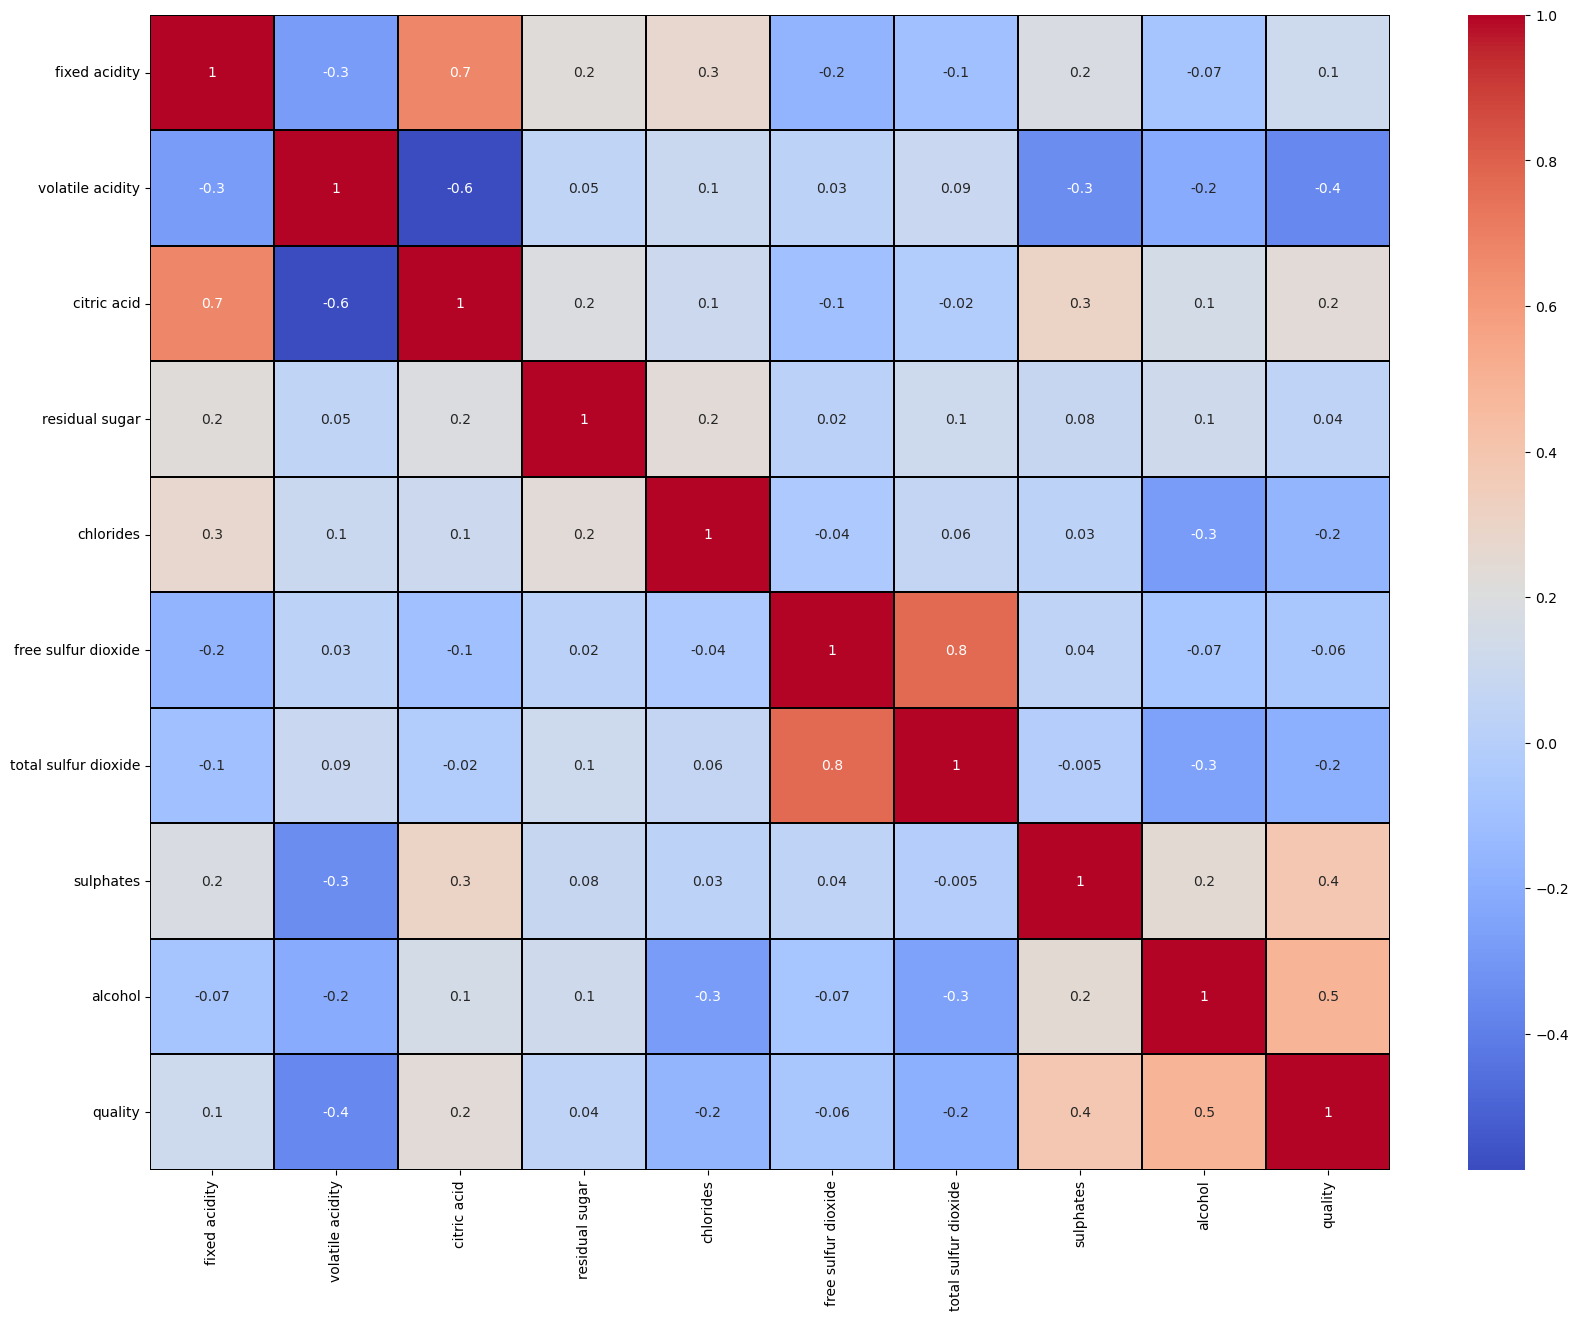

In [40]:
#Visualize the correlation through heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

The above heatmap shows the correlation between feature to feature and feature to label. We can draw the following observations from this heatmap:

1) The features alcohol, sulphates, residual sugar, citric acid and fixed acidity have positive correlation with the label.

2) The features total sulfur dioxide, free sulfur dioxide, chlorides and volatile acidity have negative correlation with the label.

3) The features citric acid and fixed acidity, total sulfur dioxide and free sulfur dioxide have high positive correlation with each other.

4) The features citric acid and volatile acidity have high negative correlation with each other.

In [41]:
#Check the correlation of features with the target
cor['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.485574
sulphates               0.388415
citric acid             0.236078
fixed acidity           0.115092
residual sugar          0.039368
free sulfur dioxide    -0.056301
chlorides              -0.161743
total sulfur dioxide   -0.187274
volatile acidity       -0.363484
Name: quality, dtype: float64

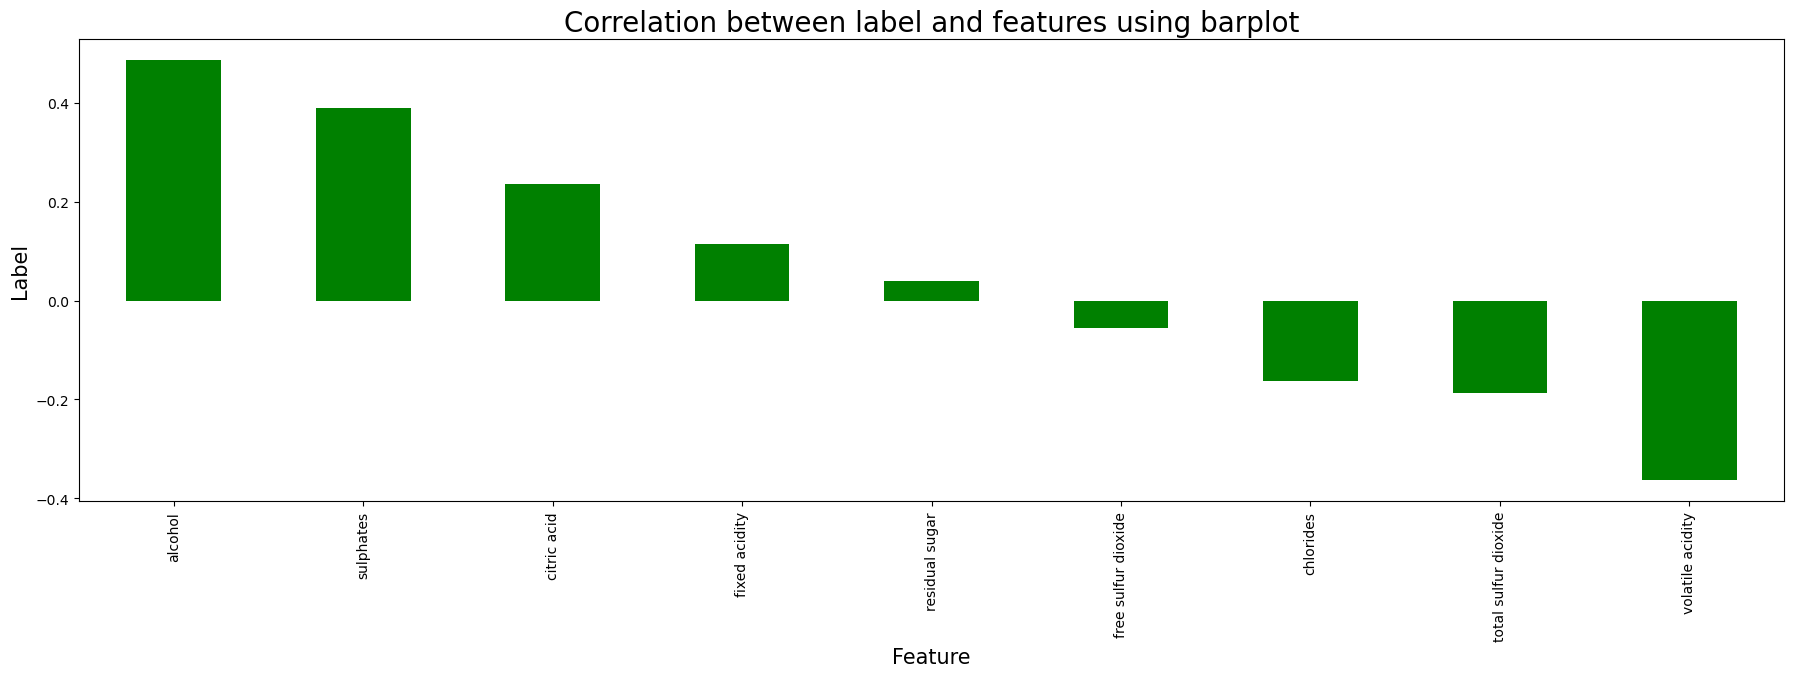

In [44]:
#Visualize the corrlation of features with the label
plt.figure(figsize=(22,6))
df1.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='green')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Label',fontsize=15)
plt.title('Correlation between label and features using barplot',fontsize=20)
plt.show()

From the above bar plot, we can observe that the feature residual sugar has very less correlation with the label.

In [45]:
#Check the number of unique values in the label "quality"
df1['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [49]:
#Check the value counts for each category in the target variable "quality"
df1['quality'].value_counts()

5    618
6    595
7    188
4     48
8     16
3      7
Name: quality, dtype: int64

Binarization of the label

In [51]:
#If wine quality is 7 or above it will be labelled as 1 (good quality) else 0 (not good quality)
df1["quality"]=[1 if x>=7 else 0 for x in df1["quality"]]
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,-0.455551,0.700,0.00,-0.592837,-0.144889,-0.246775,-0.074821,-0.580995,-1.116242,0
1,-0.168230,0.880,0.00,0.623614,0.948230,1.083788,0.943173,0.456076,-0.536502,0
2,-0.168230,0.760,0.04,0.191434,0.682946,0.232143,0.614843,0.225029,-0.536502,0
3,1.577619,0.280,0.56,-0.592837,-0.203152,0.433651,0.774699,-0.385664,-0.536502,0
4,-0.455551,0.700,0.00,-0.592837,-0.144889,-0.246775,-0.074821,-0.580995,-1.116242,0
...,...,...,...,...,...,...,...,...,...,...
1594,-1.486754,0.600,0.08,-0.368674,0.589426,1.522872,0.307018,-0.385664,0.270584,0
1595,-1.794291,0.550,0.10,0.021234,-1.041847,1.887613,0.528539,0.997141,0.881138,0
1596,-1.389282,0.510,0.13,0.191434,-0.144889,1.345641,0.165106,0.934914,0.723128,0
1597,-1.794291,0.645,0.12,-0.368674,-0.203152,1.522872,0.307018,0.671019,-0.047191,0


Separating features and label

In [52]:
x=df1.drop("quality",axis=1)
y=df1["quality"]

In [53]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,-0.455551,0.700,0.00,-0.592837,-0.144889,-0.246775,-0.074821,-0.580995,-1.116242
1,-0.168230,0.880,0.00,0.623614,0.948230,1.083788,0.943173,0.456076,-0.536502
2,-0.168230,0.760,0.04,0.191434,0.682946,0.232143,0.614843,0.225029,-0.536502
3,1.577619,0.280,0.56,-0.592837,-0.203152,0.433651,0.774699,-0.385664,-0.536502
4,-0.455551,0.700,0.00,-0.592837,-0.144889,-0.246775,-0.074821,-0.580995,-1.116242
...,...,...,...,...,...,...,...,...,...
1594,-1.486754,0.600,0.08,-0.368674,0.589426,1.522872,0.307018,-0.385664,0.270584
1595,-1.794291,0.550,0.10,0.021234,-1.041847,1.887613,0.528539,0.997141,0.881138
1596,-1.389282,0.510,0.13,0.191434,-0.144889,1.345641,0.165106,0.934914,0.723128
1597,-1.794291,0.645,0.12,-0.368674,-0.203152,1.522872,0.307018,0.671019,-0.047191


Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,-0.455551,1.036924,-1.386906,-0.592837,-0.144889,-0.246775,-0.074821,-0.580995,-1.116242
1,-0.168230,2.096360,-1.386906,0.623614,0.948230,1.083788,0.943173,0.456076,-0.536502
2,-0.168230,1.390069,-1.177465,0.191434,0.682946,0.232143,0.614843,0.225029,-0.536502
3,1.577619,-1.435092,1.545267,-0.592837,-0.203152,0.433651,0.774699,-0.385664,-0.536502
4,-0.455551,1.036924,-1.386906,-0.592837,-0.144889,-0.246775,-0.074821,-0.580995,-1.116242
...,...,...,...,...,...,...,...,...,...
1467,-1.486754,0.448349,-0.968024,-0.368674,0.589426,1.522872,0.307018,-0.385664,0.270584
1468,-1.794291,0.154061,-0.863304,0.021234,-1.041847,1.887613,0.528539,0.997141,0.881138
1469,-1.389282,-0.081369,-0.706223,0.191434,-0.144889,1.345641,0.165106,0.934914,0.723128
1470,-1.794291,0.713208,-0.758583,-0.368674,-0.203152,1.522872,0.307018,0.671019,-0.047191


Now, we have done feature scaling using Standard Scalarization to overcome biasness in the model.

Checking Variance Inflation Factor (VIF)

In [55]:
#Find Variance Inflation Factor of each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,2.197159,fixed acidity
1,1.787261,volatile acidity
2,2.942884,citric acid
3,1.219969,residual sugar
4,1.251839,chlorides
5,2.791230,free sulfur dioxide
6,3.073029,total sulfur dioxide
7,1.220656,sulphates
8,1.463039,alcohol


We check VIF values to find out if there is any multicollinearity problem with the features which we need to solve. From the above table, we can see that none of the features have VIF value greater than 10. So, we can conclude that there is no multicollinearity problem in the features and we can proceed to the next steps.

In [56]:
y.value_counts()

0    1268
1     204
Name: quality, dtype: int64

From the above, we can see that the data in the label is not balanced. This is a classification problem so, we need to balance the data.

Balancing the data

In [57]:
#Oversampling the data using SMOTE
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [58]:
y.value_counts()

0    1268
1     204
Name: quality, dtype: int64

In [59]:
y1.value_counts()

0    1268
1    1268
Name: quality, dtype: int64

Now, the data is balanced and we can proceed to model building.

In [60]:
x1.shape

(2536, 9)

In [61]:
y1.shape

(2536,)

# Model Building

Finding the best random state

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    ET=ExtraTreesClassifier()
    ET.fit(x_train,y_train)
    pred=ET.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random state",maxRS)

Best accuracy is  0.9658344283837057 at random state 84


Creating train test split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

Importing the necessary modules

In [65]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.1/99.8 MB 326.1 kB/s eta 0:05:06
   ---------------------------------------- 0.1/99.8 MB 326.1 kB/s eta 0:05:06
   ---------------------------------------- 0.1/99.8 MB 327.7 kB/s eta 0:05:05
   ---------------------------------------- 0.1/99.8 MB 363.1 kB/s eta 0:04:35
   ---------------------------------------- 0.1/99.8 MB 405.9 kB/s eta 0:04:06
   ---------------------------------------- 0.2/99.8 MB 471.4 kB/s eta 0:03:32
   --------------------

Random Forest Classifier

In [74]:
#Checking accuracy for RandomForestClassfier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9487516425755584
[[341  22]
 [ 17 381]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       363
           1       0.95      0.96      0.95       398

    accuracy                           0.95       761
   macro avg       0.95      0.95      0.95       761
weighted avg       0.95      0.95      0.95       761



The accuracy score for Random Forest Classifier is 94.87%

Extra Trees Classifier

In [75]:
#Checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9579500657030223
[[338  25]
 [  7 391]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       363
           1       0.94      0.98      0.96       398

    accuracy                           0.96       761
   macro avg       0.96      0.96      0.96       761
weighted avg       0.96      0.96      0.96       761



The accuracy score for Extra Trees Classifier is 95.79%

Logistic Regression

In [77]:
#Checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8186596583442839
[[292  71]
 [ 67 331]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       363
           1       0.82      0.83      0.83       398

    accuracy                           0.82       761
   macro avg       0.82      0.82      0.82       761
weighted avg       0.82      0.82      0.82       761



The accuracy score for Logistic Regression is 81.86%

XGB Classifier

In [78]:
#Checking accuracy for XGB Classifier
XGB=XGBClassifier()
XGB.fit(x_train,y_train)
predXGB=XGB.predict(x_test)
print(accuracy_score(y_test,predXGB))
print(confusion_matrix(y_test,predXGB))
print(classification_report(y_test,predXGB))

0.9526938239159002
[[340  23]
 [ 13 385]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       363
           1       0.94      0.97      0.96       398

    accuracy                           0.95       761
   macro avg       0.95      0.95      0.95       761
weighted avg       0.95      0.95      0.95       761



The accuracy for XGB Classifier is 95.26%

Gradient Boosting Classifier

In [79]:
#Checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9067017082785808
[[326  37]
 [ 34 364]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       363
           1       0.91      0.91      0.91       398

    accuracy                           0.91       761
   macro avg       0.91      0.91      0.91       761
weighted avg       0.91      0.91      0.91       761



The accuracy for Gradient Boosting Classifier is 90.67%

AdaBoost Classifier

In [80]:
#Checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8817345597897503
[[316  47]
 [ 43 355]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       363
           1       0.88      0.89      0.89       398

    accuracy                           0.88       761
   macro avg       0.88      0.88      0.88       761
weighted avg       0.88      0.88      0.88       761



The accuracy for AdaBoost Classifier is 88.17%

Bagging Classifier

In [81]:
#Checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9342969776609724
[[343  20]
 [ 30 368]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       363
           1       0.95      0.92      0.94       398

    accuracy                           0.93       761
   macro avg       0.93      0.93      0.93       761
weighted avg       0.93      0.93      0.93       761



The accuracy for Bagging Classifier is 93.42%

# Cross Validation

In [82]:
#Checking CV score for Random Forest Classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)-score.mean())

[0.96653543 0.87573964 0.92504931 0.88362919 0.91518738]
0.9132281911506623
Difference between accuracy score and cross validation score is -  0.0355234514248961


In [83]:
#Checking CV score for Extra Trees Classifier
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predET)-score.mean())

[0.98228346 0.89349112 0.95463511 0.8974359  0.93688363]
0.932945844787153
Difference between accuracy score and cross validation score is -  0.02500422091586929


In [84]:
#Checking CV score for Logistic Regression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predLR)-score.mean())

[0.87992126 0.765286   0.82445759 0.72781065 0.79684418]
0.79886393638665
Difference between accuracy score and cross validation score is -  0.019795721957633905


In [85]:
#Checking CV score for XGB Classifier
score=cross_val_score(XGB,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predXGB)-score.mean())

[0.95275591 0.88757396 0.93885602 0.87573964 0.91518738]
0.9140225814968396
Difference between accuracy score and cross validation score is -  0.038671242419060614


In [86]:
#Checking CV score for Gradient Boosting Classifier
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predGB)-score.mean())

[0.90748031 0.8382643  0.9112426  0.83037475 0.88362919]
0.8741982326173725
Difference between accuracy score and cross validation score is -  0.03250347566120826


In [87]:
#Checking CV score for AdaBoost Classifier
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predABC)-score.mean())

[0.8996063  0.82840237 0.84220907 0.80473373 0.83431953]
0.8418541986985355
Difference between accuracy score and cross validation score is -  0.039880361091214844


In [88]:
#Checking CV score for Bagging Classifier
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predBC)-score.mean())

[0.93503937 0.85798817 0.91518738 0.86390533 0.90532544]
0.8954891363431642
Difference between accuracy score and cross validation score is -  0.038807841317808234


Logistic Regression is the best model because the difference between accuracy score and cross validation score for this model is the least.

# Hyper Parameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
       'C': np.logspace(-4, 4, 20),
       'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
       'l1_ratio': [0, 0.5, 1]
      }
GCV=GridSearchCV(LogisticRegression(),param,cv=5,verbose=2,n_jobs=-1)

In [91]:
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'l1_ratio': [0, 0.5, 1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [92]:
GCV.best_params_

{'C': 0.03359818286283781,
 'l1_ratio': 0,
 'penalty': 'l2',
 'solver': 'newton-cg'}

# Building the Final Model

In [93]:
final_model=LogisticRegression(C=0.03359818286283781,l1_ratio=0,penalty='l2',solver='newton-cg')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

82.26018396846256


Therefore, the accuracy acheived by the final model is 82.26%

Plotting ROC and comparing AUC for the best model

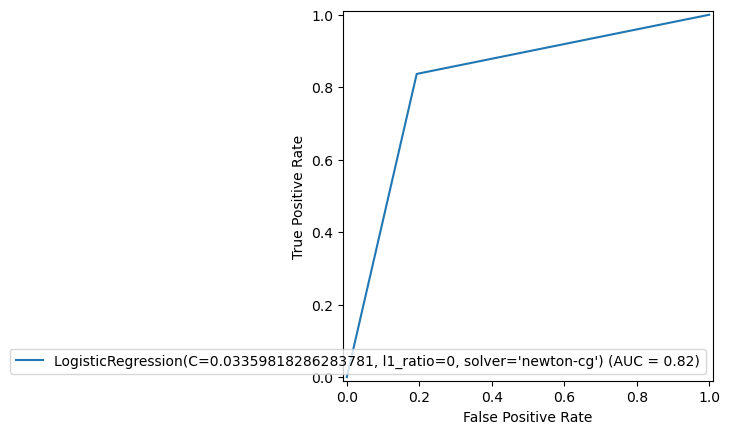

In [94]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

Above is the ROC curve for the final model and AUC value for the final model is 82%.

Saving the model

In [95]:
#Saving the model using .pkl
import joblib
joblib.dump(final_model,"Red_Wine_Quality_Prediction.pkl")

['Red_Wine_Quality_Prediction.pkl']

Predicting using the saved model

In [96]:
#Load the saved model
model=joblib.load("Red_Wine_Quality_Prediction.pkl")

#Prediction
prediction=model.predict(x_test)
prediction

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

Original vs predicted values

In [97]:
a=np.array(y_test)
df2=pd.DataFrame()
df2['Predicted']=prediction
df2['Original']=a
df2

,Predicted,Original
0,0,0
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
756,1,1
757,0,0
758,0,0
759,0,0
